In [29]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [1]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import io

In [2]:
vocab_size = 10000 #maximum number of tokens
embedding_dim = 16 #used in the model
max_length = 100
trunc_type='post' 
padding_type='post'
oov_tok = "????"
training_size = 20000

In [32]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O sarcasm.json

--2021-05-30 18:47:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.210.80, 142.250.180.48, 142.250.185.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.210.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: 'sarcasm.json'

     0K .......... .......... .......... .......... ..........  0% 1.30M 4s
    50K .......... .......... .......... .......... ..........  1% 2.87M 3s
   100K .......... .......... .......... .......... ..........  2% 4.88M 2s
   150K .......... .......... .......... .......... ..........  3% 5.87M 2s
   200K .......... .......... .......... .......... ..........  4% 1.19M 2s
   250K .......... .......... .......... .......... ..........  5% 1.15M 3s
   300K .......... .......... .......... .......... ..........  6% 1.19M 3s
   350K .......... .......... .......... ..

In [3]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences) # This assigns numbers to each word

word_index = tokenizer.word_index # This stores the assigned number-word pair in a dictionary

# Converting Training Data to sequences and then padding them
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_sequences_padded = pad_sequences(training_sequences)

# Converting Testing Data to sequences and then padding them
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_sequences_padded = pad_sequences(testing_sequences)

# Information about training data
print("\nPadded Sequences:")
print(training_sequences_padded)
print("\nShape:", training_sequences_padded.shape)
print("\nThe Maximum length is: ", max(len(i) for i in training_sequences_padded))

# Information about testing data
print("\nPadded Sequences:")
print(testing_sequences_padded)
print("\nShape:", testing_sequences_padded.shape)
print("\nThe Maximum length is: ", max(len(i) for i in testing_sequences_padded))


Padded Sequences:
[[   0    0    0 ...    6 2614 8863]
 [   0    0    0 ...  251    9  889]
 [   0    0    0 ...   45    2 8864]
 ...
 [   0    0    0 ...  417 2231  139]
 [   0    0    0 ...    1  918 8166]
 [   0    0    0 ...    1    1    1]]

Shape: (20000, 40)

The Maximum length is:  40

Padded Sequences:
[[   0    0    0 ...    5  519  109]
 [   0    0    0 ...    2  854  773]
 [   0    0    0 ...    8    4 3861]
 ...
 [   0    0    0 ...    1    9   67]
 [   0    0    0 ... 1745 3663 3684]
 [   0    0    0 ...    4    1  742]]

Shape: (6709, 38)

The Maximum length is:  38


In [9]:
training_sequences_padded = np.array(training_sequences_padded)
training_labels = np.array(training_labels)
testing_sequences_padded = np.array(testing_sequences_padded)
testing_labels = np.array(testing_labels)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
num_epochs = 30
history = model.fit(training_sequences_padded, training_labels, epochs=num_epochs, validation_data=(testing_sequences_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5784 - accuracy: 0.6890 - val_loss: 0.4013 - val_accuracy: 0.8311
Epoch 2/30
625/625 - 0s - loss: 0.3213 - accuracy: 0.8680 - val_loss: 0.3435 - val_accuracy: 0.8551
Epoch 3/30
625/625 - 0s - loss: 0.2427 - accuracy: 0.9044 - val_loss: 0.3405 - val_accuracy: 0.8556
Epoch 4/30
625/625 - 0s - loss: 0.1980 - accuracy: 0.9234 - val_loss: 0.3566 - val_accuracy: 0.8554
Epoch 5/30
625/625 - 0s - loss: 0.1634 - accuracy: 0.9386 - val_loss: 0.3912 - val_accuracy: 0.8456
Epoch 6/30
625/625 - 0s - loss: 0.1394 - accuracy: 0.9495 - val_loss: 0.4116 - val_accuracy: 0.8504
Epoch 7/30
625/625 - 0s - loss: 0.1205 - accuracy: 0.9578 - val_loss: 0.4520 - val_accuracy: 0.8425
Epoch 8/30
625/625 - 0s - loss: 0.1036 - accuracy: 0.9646 - val_loss: 0.4888 - val_accuracy: 0.8413
Epoch 9/30
625/625 - 0s - loss: 0.0905 - accuracy: 0.9700 - val_loss: 0.5272 - val_accuracy: 0.8410
Epoch 10/30
625/625 - 0s - loss: 0.0784 - accuracy: 0.9752 - val_loss: 0.5727 - val_accuracy: 0.8378

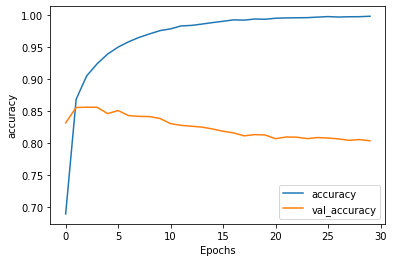

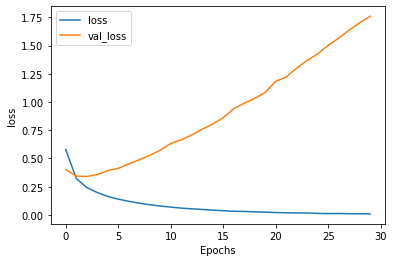

In [13]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_sequences_padded[0]))
print(training_sentences[2])
print(labels[2])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? former ???? store clerk sues over secret 'black ???? for minority shoppers
mom starting to fear son's web series closest thing she will have to grandchild
1


In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [53]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [30]:
sentence = ["fuck you bitch asshole", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[1.0000000e+00]
 [7.2353825e-05]]
